In [13]:
#importing Libraries
import geopandas as gpd
import geoplot as gpt
import matplotlib.pyplot as plt
import folium



In [14]:
#Casting files and loading files rows=1000
Lahore=gpd.read_file('./TrafficHotspots.geojson')
Education=gpd.read_file('./All POIs - GoogleScrapping/POI_Education.shp',rows=1000)
Food=gpd.read_file('./All POIs - GoogleScrapping/POI_Food Points.shp',rows=1000)
Hospital=gpd.read_file('./All POIs - GoogleScrapping/POI_Health Points.shp')
Pharamices=gpd.read_file('./All POIs - GoogleScrapping/POI_Pharmacies.shp',rows=1000)
Banks=gpd.read_file('./All POIs - GoogleScrapping/Post_Processed_Banks.shp',rows=1000)
Shops=gpd.read_file('./All POIs - GoogleScrapping/Post_Processed_Shops.shp',rows=1000)
Super_shop=gpd.read_file('./All POIs - GoogleScrapping/Post_Processed_Super Markets.shp',rows=1000)
Police_station=gpd.read_file('./All POIs - GoogleScrapping/Post_Processed_Police Stations.shp',rows=100)
Mosque=gpd.read_file('./All POIs - GoogleScrapping/Post_Processed_Mosques.shp',rows=1000)



In [15]:
#Setting Projection to epsg=3857
Education=Education.to_crs(epsg=3857)
Food=Food.to_crs(epsg=3857)
Hospital=Hospital.to_crs(epsg=3857)
Pharamices=Pharamices.to_crs(epsg=3857)
Banks=Banks.to_crs(epsg=3857)
Shops=Shops.to_crs(epsg=3857)
Super_shop=Super_shop.to_crs(epsg=3857)
Police_station=Police_station.to_crs(epsg=3857)
Mosque=Mosque.to_crs(epsg=3857)




In [16]:
#Points
Lahore.head()

,level,id,geometry
0,5,None,POINT (8272683.570 3707830.754)
1,5,None,POINT (8272668.626 3707626.113)
2,5,None,POINT (8272950.067 3707699.199)
3,5,None,POINT (8272481.829 3707626.113)
4,5,None,POINT (8272501.754 3707833.678)


In [17]:
#Buffer of 500
Lahore['geometry']=Lahore.buffer(500)

In [18]:
#overlay data
Lahore_Education=gpd.overlay(Education,Lahore,how='intersection')
Lahore_Food=gpd.overlay(Food,Lahore,how='intersection')
Lahore_Shop=gpd.overlay(Shops,Lahore,how='intersection')
Lahore_Super_Shop=gpd.overlay(Super_shop,Lahore,how='intersection')
Lahore_Hospital=gpd.overlay(Hospital,Lahore,how='intersection')
Lahore_Pharamices=gpd.overlay(Pharamices,Lahore,how='intersection')
Lahore_Police_station=gpd.overlay(Police_station,Lahore,how='intersection')
Lahore_Mosque=gpd.overlay(Mosque,Lahore,how='intersection')
Lahore_Banks=gpd.overlay(Banks,Lahore,how='intersection')

In [19]:
Lahore_Education.head()


,name,POI,level,id,geometry
0,None,Education,1,None,POINT (8255277.000 3685107.000)
1,None,Education,2,None,POINT (8256454.000 3685901.000)
2,None,Education,2,None,POINT (8256058.000 3685652.000)
3,None,Education,2,None,POINT (8256612.000 3685636.000)
4,None,Education,3,None,POINT (8258623.000 3684354.000)


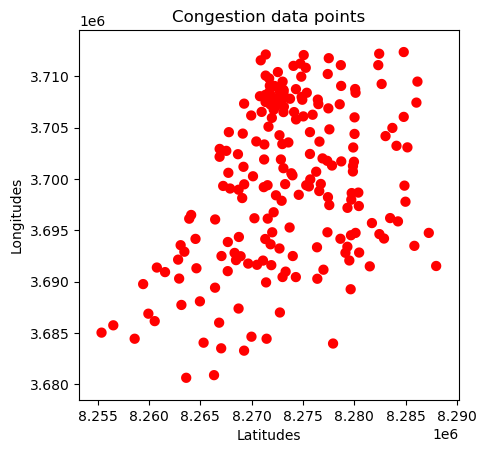

In [20]:
Lahore.plot(color='red')
plt.title("Congestion data points")
plt.xlabel("Latitudes")
plt.ylabel("Longitudes")
plt.savefig('./Vistualization/Lahore.png')




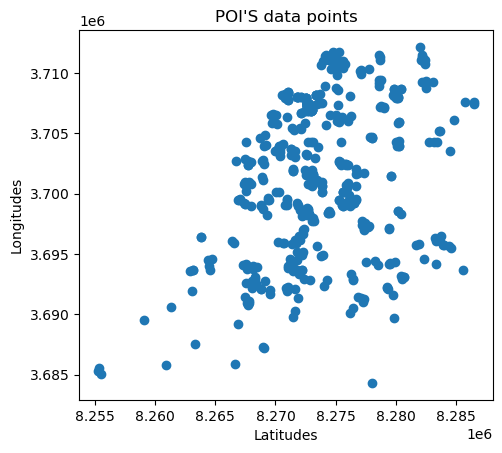

In [21]:
Lahore_Hospital.plot()
plt.title("POI'S data points")
plt.xlabel("Latitudes")
plt.ylabel("Longitudes")
plt.savefig('./Vistualization/POI_data.png')


In [22]:
#Visualization
#BaseMap
map = folium.Map(location=[31.530868042142394,74.3563528623885],tiles=("Stamen Terrain") ,zoom_start=12)
map

In [23]:
style1 = {'fillColor': '#228B22', 'color': '#228B22'}#Green
style2 = {'fillColor': '#00FFFFFF', 'color': '#00FFFFFF'}##00FFFF
style3 = {'fillColor': '#F6C60F', 'color': '#F6C60F'} #Yellow
style4 = {'fillColor': '#FF0000', 'color': '#FF0000'} #Red

In [24]:
#Adding the points
folium.GeoJson(Lahore,style_function=lambda x:style4).add_to(map)
folium.GeoJson(Lahore_Education).add_to(map)
folium.GeoJson(Lahore_Hospital,tooltip='Hospital',).add_to(map)
folium.GeoJson(Lahore_Shop,tooltip='Shops').add_to(map)
folium.GeoJson(Lahore_Super_Shop,tooltip='Super_shop').add_to(map)
folium.GeoJson(Lahore_Mosque,tooltip='Mosque').add_to(map)
folium.GeoJson(Lahore_Police_station,tooltip='Police_Station').add_to(map)
folium.GeoJson(Lahore_Banks,tooltip='Banks').add_to(map)
folium.GeoJson(Lahore_Pharamices,tooltip='Pharamices').add_to(map)
folium.GeoJson(Lahore_Food,tooltip='Food_point').add_to(map)













